Prediksi Gender dengan metode

# Import Library and Data

In [1]:
# import labrary yang digunakan

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("prediksi_gender_tinggi_berat.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


# Data Preparation

In [3]:
# Mengecek data apa terdapat null value
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [4]:
# mengecek data apa terdapat  duplikat atau tidak
df.duplicated().sum()

11

In [5]:
# Karena terdapat data duplikat maka data tersebut di hapus
df = df.drop_duplicates().reset_index(drop=True)

# mengecek kembali
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  489 non-null    object
 1   Height  489 non-null    int64 
 2   Weight  489 non-null    int64 
 3   Index   489 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.4+ KB


In [7]:
# Melakukan replace data
df.replace('Male', 1, inplace=True)
df.replace('Female', 0, inplace=True)

In [8]:
df

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
484,0,150,153,5
485,0,184,121,4
486,0,141,136,5
487,1,150,95,5


In [9]:
# Menlakukan drop kolom pada kolom yang tidak di gunakan
df = df.drop(columns=['Index'], axis=1)
df

,Gender,Height,Weight
0,1,174,96
1,1,189,87
2,0,185,110
3,0,195,104
4,1,149,61
...,...,...,...
484,0,150,153
485,0,184,121
486,0,141,136
487,1,150,95


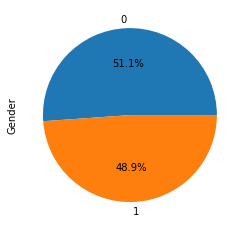

In [36]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Dari Grafik di atas pembagian data tidak seimbang. Sehingga perlu di lakukan imbelencing data dalam melakukan modeling

# Modeling

In [18]:
# import labrary untuk train test split dan menngecek akurasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 

In [37]:
# membagi data dengan 80% Untuk data training dan 20% untuk data testing
X = df[['Height', 'Weight']]
y = df['Gender']

In [38]:
#import labrary untuk imbalencing data
from imblearn.over_sampling import SMOTE
#Melakukan imbalence data
smt = SMOTE(random_state = 42)
X, y = smt.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

**Model Gaussian Naive Bayes**

In [39]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
modelgnb.fit(X_train, y_train)

GaussianNB()

In [40]:
y_pred = modelgnb.predict(X_test)
acm1 = metrics.accuracy_score(y_test, y_pred)

print('Model',modelgnb)
print('Akurasi Modelnya :', acm1)

Model GaussianNB()
Akurasi Modelnya : 0.52


**Model Random Forest Classifer**

In [41]:
from sklearn.ensemble import RandomForestClassifier
modelrfc = RandomForestClassifier()
modelrfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred2 = modelrfc.predict(X_test)
acm2 = metrics.accuracy_score(y_test, y_pred2)

print('Model',modelrfc)
print('Akurasi Modelnya :', acm2)

Model RandomForestClassifier()
Akurasi Modelnya : 0.55


In [43]:
# prediksi data baru

import warnings
warnings.filterwarnings('ignore')

tinggi = int(input('berapa tinggi kamu? '))
berat = int(input('berapa berat kamu? '))

hasil_prediksi  = modelrfc.predict([[tinggi, berat]])
hasil_prediksi

if hasil_prediksi == 1:
  print('Laki-laki')
elif hasil_prediksi == 0:
  print('Perempuan')

berapa tinggi kamu? 169
berapa berat kamu? 69
Laki-laki


# Kesimpulan

- Dari model ML yang dilakukan model Random Fores Clasifer memberikan hasil yang lebih baik, dan dalam melakukan prediksi juga memberikan hasil yang sesuai. 
- Dari model diatas juga dilakukan imbalence data, hal tersebut bertujuan untuk agar data yang digunakan mendapatkan proporsi yang sama. Hal itu bisa saja tidak perlu dilakukan apabila pembagian data yang di awal sama atau mendekati proporsi yang sama, namum dalam kasus ini menerapkan imbalence data. Salah satu cara lain untuk meningkatkan performa model yaitu Hyperparameter tuning namum dapat saja menyebabkan model menjadi overfiting.